In [1]:
from EMBEDR import EMBEDR, EMBEDR_sweep
import numpy as np

In [2]:
X = np.loadtxt("./X_mousebrain.txt").astype(float)

In [5]:
sweepObj = EMBEDR_sweep(project_name="EMBEDR_Sweep_Example",
                        project_dir="./",
                        DRA='tsne',
                        n_jobs=-1,  ## Set to -1 to use all available processors.
                        verbose=3,  ## Set to 0 to suppress output.
                        n_data_embed=3,
                        n_null_embed=1,
                        sweep_type='perplexity',
                        sweep_values=[5*i for i in range(1,31)])
sweepObj.fit(X[0:999,])


Initializing EMBEDR hyperparameter sweep!
Array of hyperparameter values provided, ignoring input values for `n_sweep_values`, `min_sweep_value, and `max_sweep_value`.
Hyperparameter values specified absolutely!

Sweeping over 30 values of the 'perplexity' parameter!

Fitting 'perplexity' sweep!
All hyperparameter values provided absolutely!

Fitting data with 'perplexity' = 150 (1 / 30)


	EMBEDR Class v2.1.1

	Intermediate results for the EMBEDR_Sweep_Example project will be cached in ./!
	kNN algorithm is auto
	Affinity type is fixed_entropy_gauss
	Dim.Red. Algorithm is tsne
	n_components = 2
	n_data_embed = 3
	n_null_embed = 1

Initializing kNN index...


TypeError: argument of type 'builtin_function_or_method' is not iterable

In [9]:
_, optimal_perplexity = sweepObj.get_optimal_hyperparameters()

Setting optimal perplexity using normal fits.


In [6]:
pvalues = {str(k): v for k, v in sweepObj.pValues.items()}
np.savez('embedr_mouse_brain.npz', **pvalues)

In [10]:
from scipy.stats import mode
mode(optimal_perplexity)

ModeResult(mode=5.0, count=525)

/Users/zhexuanliu/anaconda3/lib/python3.11/site-packages/EMBEDR/plotting_utility.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  inner_gs.tight_layout(fig,
/Users/zhexuanliu/anaconda3/lib/python3.11/site-packages/EMBEDR/plotting_utility.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=fig_pad)
/Users/zhexuanliu/anaconda3/lib/python3.11/site-packages/EMBEDR/plotting_utility.py:79: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=fig_pad)


<Axes: xlabel='$k_{\\mathrm{Eff}}$'>

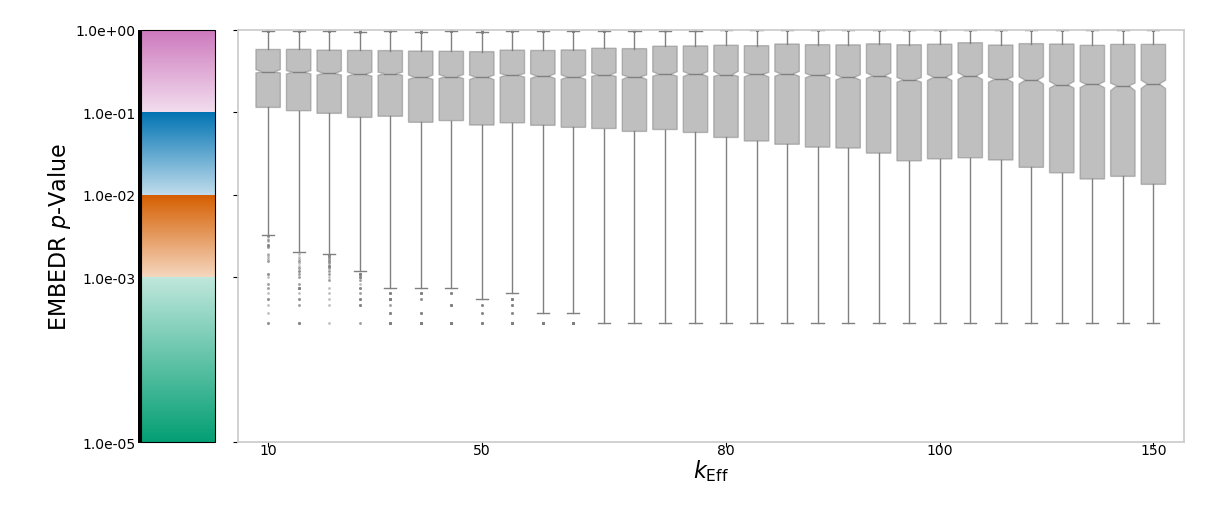

In [7]:
sweepObj.sweep_boxplot()